# Project 3 - Water Wells

In [115]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

training_labels = pd.read_csv('../Data/training_set_labels.csv')
training_values = pd.read_csv('../Data/training_set_values.csv')
test_values = pd.read_csv('../Data/test_set_values.csv')
training_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [116]:
training_labels['status_group'] = training_labels['status_group'].map({'non functional': 'non operational', 'functional': 'operational', 
                                     'functional needs repair': 'operational'})
training_labels['status_group'].value_counts()

operational        36576
non operational    22824
Name: status_group, dtype: int64

In [117]:
training_values.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [118]:
df = training_values.merge(training_labels, on='id')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,operational
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,operational
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,operational
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non operational
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,operational


In [119]:
df['status_group'] = df['status_group'].map({'non operational': 0, 'operational': 1})
df['status_group'].value_counts()

1    36576
0    22824
Name: status_group, dtype: int64

In [120]:
df.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082,-0.003827
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915,0.051170
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727,0.106942
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732,-0.036516
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278,0.027984
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056,0.003886
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724,-0.105444
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315,-0.070882
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910,0.016576
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000,0.031934


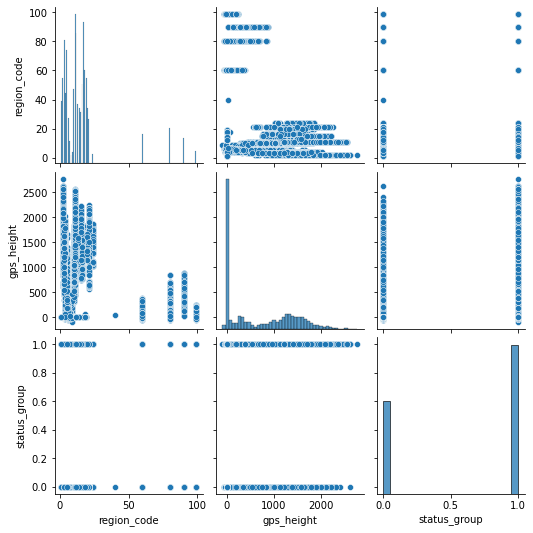

In [121]:
sns.pairplot(df, vars=['region_code', 'gps_height', 'status_group'])

id                           1
amount_tsh                   1
date_recorded                1
funder                       1
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [123]:
obj_df = df.select_dtypes(object)
obj_df

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,2011-03-14,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,2013-03-06,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,NaN,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,2013-02-25,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,2013-01-28,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,2011-07-13,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,2013-05-03,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,True,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,2011-05-07,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,True,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,2011-04-11,NaN,NaN,Mashine,Rufiji,Madungulu,Mbeya,Mbarali,Chimala,True,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,2011-03-08,Malec,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,True,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [1]:
obj_df.info()

NameError: name 'obj_df' is not defined

In [125]:
obj_df.describe()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,...,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


In [126]:
obj_df['installer'].value_counts()[:20]

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
LGA                     408
World vision            408
WEDECO                  397
TASAF                   396
District council        392
Name: installer, dtype: int64

In [127]:
obj_df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [128]:
obj_df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [129]:
obj_df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [130]:
obj_df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [131]:
obj_df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [132]:
obj_df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [133]:
obj_df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [134]:
obj_df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [135]:
obj_df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

quantity               59400 non-null  object
 24  quantity_group         59400 non-null  object
 25  source                 59400 non-null  object
 26  source_type            59400 non-null  object
 27  source_class           59400 non-null  object
 28  waterpoint_type  

In [136]:
from sklearn.preprocessing import OneHotEncoder

In [137]:
ohe_df = df[['permit', 'payment', 'quality_group', 'quantity_group', 
             'source', 'status_group']]
ohe_df.dropna(inplace=True)

<ipython-input-137-9ae381764a6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohe_df.dropna(inplace=True)


In [138]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(ohe_df)

OneHotEncoder(sparse=False)

In [139]:
ohe_df1 = ohe.transform(ohe_df)
ohe_df1

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [140]:
ohe.get_feature_names()

array(['x0_False', 'x0_True', 'x1_never pay', 'x1_other',
       'x1_pay annually', 'x1_pay monthly', 'x1_pay per bucket',
       'x1_pay when scheme fails', 'x1_unknown', 'x2_colored',
       'x2_fluoride', 'x2_good', 'x2_milky', 'x2_salty', 'x2_unknown',
       'x3_dry', 'x3_enough', 'x3_insufficient', 'x3_seasonal',
       'x3_unknown', 'x4_dam', 'x4_hand dtw', 'x4_lake', 'x4_machine dbh',
       'x4_other', 'x4_rainwater harvesting', 'x4_river',
       'x4_shallow well', 'x4_spring', 'x4_unknown', 'x5_0', 'x5_1'],
      dtype=object)

In [141]:
pd.DataFrame(ohe_df1, columns=ohe.get_feature_names())

,x0_False,x0_True,x1_never pay,x1_other,x1_pay annually,x1_pay monthly,x1_pay per bucket,x1_pay when scheme fails,x1_unknown,x2_colored,...,x4_lake,x4_machine dbh,x4_other,x4_rainwater harvesting,x4_river,x4_shallow well,x4_spring,x4_unknown,x5_0,x5_1
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56339,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
56340,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
56341,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56342,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## In-Depth EDA - Comparisons

In [142]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date_recorded          59400 non-null  object
 1   funder                 55765 non-null  object
 2   installer              55745 non-null  object
 3   wpt_name               59400 non-null  object
 4   basin                  59400 non-null  object
 5   subvillage             59029 non-null  object
 6   region                 59400 non-null  object
 7   lga                    59400 non-null  object
 8   ward                   59400 non-null  object
 9   public_meeting         56066 non-null  object
 10  recorded_by            59400 non-null  object
 11  scheme_management      55523 non-null  object
 12  scheme_name            31234 non-null  object
 13  permit                 56344 non-null  object
 14  extraction_type        59400 non-null  object
 15  extraction_type_gro

In [143]:
obj_df['date_recorded'].value_counts()

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-12      1
2011-09-28      1
2002-10-14      1
2011-09-21      1
2011-09-15      1
Name: date_recorded, Length: 356, dtype: int64

### Installer and Funder

In [144]:
obj_df['installer'].value_counts()

DWE                        17402
Government                  1825
RWE                         1206
Commu                       1060
DANIDA                      1050
                           ...  
IUCN                           1
JESHI LA WOKOVU                1
plan int                       1
Village water attendant        1
HOWARD HUMFREYS                1
Name: installer, Length: 2145, dtype: int64

In [145]:
obj_df['funder'].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Kauzeni                      1
Norplan                      1
Tredsp                       1
Dagida                       1
Silinda Yetu                 1
Name: funder, Length: 1897, dtype: int64

In [146]:
len(obj_df['funder'].unique())

1898

In [147]:
fund_inst_na = obj_df[['funder', 'installer']].isna()

In [148]:
fund_inst_na.loc[fund_inst_na['funder'] != fund_inst_na['installer']]

,funder,installer
159,False,True
363,False,True
1094,True,False
1250,False,True
1276,True,False
...,...,...
54667,False,True
54797,False,True
56101,True,False
56793,True,False


only 126 rows where null values do not match in both funder & installer (within the all null values for both columns)

### Geographic catgeories

#### Seems like there is some redundant information in 'wpt name','subvillage', 'ward', 'lga', 'region' -- these could likely be condensed. 'basin' could be of interest...

In [149]:
obj_df['wpt_name'].value_counts()[:10]

none               3563
Shuleni            1748
Zahanati            830
Msikitini           535
Kanisani            323
Bombani             271
Sokoni              260
Ofisini             254
School              208
Shule Ya Msingi     199
Name: wpt_name, dtype: int64

In [150]:
obj_df['subvillage'].value_counts()

Madukani         508
Shuleni          506
Majengo          502
Kati             373
Mtakuja          262
                ... 
Ng'Engwambula      1
Ikobanhwi          1
Kwa Mgama          1
Choza Misasa       1
Nkwamembi          1
Name: subvillage, Length: 19287, dtype: int64

In [151]:
obj_df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [152]:
obj_df['ward'].value_counts()

Igosi        307
Imalinyi     252
Siha Kati    232
Mdandu       231
Nduruma      217
            ... 
Thawi          1
Kinungu        1
Mawenzi        1
Ukata          1
Sungwisi       1
Name: ward, Length: 2092, dtype: int64

In [153]:
obj_df['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [154]:
obj_df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

### Public Meeting

In [155]:
obj_df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

### Recorded by

In [156]:
obj_df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

This column can most likely be dropped as all values are the same

### 'scheme_name' vs. 'scheme_management'

In [157]:
obj_df['scheme_name'].isna()

0        False
1         True
2        False
3         True
4         True
         ...  
59395    False
59396    False
59397     True
59398     True
59399     True
Name: scheme_name, Length: 59400, dtype: bool

In [158]:
obj_df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [159]:
obj_df.loc[obj_df['scheme_management'] == 'Private operator'][['scheme_name', 'scheme_management']]

,scheme_name,scheme_management
10,NaN,Private operator
66,NaN,Private operator
97,NaN,Private operator
145,NaN,Private operator
166,NaN,Private operator
...,...,...
59020,NaN,Private operator
59138,MAKOGA WATER SUPPLY,Private operator
59323,NaN,Private operator
59348,Magati gravity spri,Private operator


In [160]:
obj_df.loc[obj_df['scheme_management'] == 'Company'][['scheme_name', 'scheme_management']]

,scheme_name,scheme_management
28,Kitukuni water supply,Company
92,Bagamoyo wate,Company
197,EKTM 3 water supply,Company
365,Ikela Wa,Company
464,Kasurua water supply,Company
...,...,...
59055,Mashati water supply,Company
59152,Bagamoyo wate,Company
59175,Kisale Kitale B water supply,Company
59228,Ndimira water supply,Company


In [161]:
obj_df.loc[obj_df['scheme_management'].isna() == True]

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
4,2011-07-13,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
7,2012-10-09,Rwssp,DWE,Tushirikiane,Lake Tanganyika,Nyawishi Center,Shinyanga,Kahama,Chambo,True,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
9,2011-08-03,Isingiro Ho,Artisan,Kwapeto,Lake Victoria,Mkonomre,Kagera,Karagwe,Kaisho,True,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
18,2011-07-22,Hesawa,DWE,Ngomee,Lake Victoria,Center,Mwanza,Ukerewe,Ilangala,NaN,...,never pay,milky,milky,insufficient,insufficient,spring,spring,groundwater,other,other
27,2011-07-11,Hesawa,DWE,Kwawilliam,Lake Victoria,Chakahaya,Kagera,Karagwe,Nyaishozi,True,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59329,2013-02-09,Rwssp,DWE,Kasela,Lake Victoria,Kasela,Shinyanga,Kahama,Malunga,True,...,unknown,milky,milky,insufficient,insufficient,shallow well,shallow well,groundwater,other,other
59344,2013-10-03,NaN,NaN,Pentecoste Swidish,Internal,Madukani,Arusha,Meru,Ngarenanyuki,NaN,...,unknown,unknown,unknown,unknown,unknown,spring,spring,groundwater,communal standpipe,communal standpipe
59362,2011-03-02,Samlo,SHIPO,none,Lake Nyasa,Mnogelwa,Iringa,Njombe,Luponde,True,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59370,2013-01-29,NaN,NaN,Village Office,Lake Tanganyika,Mazungwe,Kigoma,Kasulu,Rusesa,True,...,monthly,unknown,unknown,unknown,unknown,unknown,other,unknown,other,other



- Scheme Management is much more organized than scheme name but has ~3,900 nulls - **how do we deal with them?**
- Scheme name is messy and can likely be droppped -- it also contains 20K+ nulls

In [162]:
obj_df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

### Extraction type vs. group vs class

In [163]:
obj_df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [164]:
obj_df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [165]:
obj_df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

### Between the 3 categories, it seems as though 'type_group' might be best to focus on
- it is more organised than just 'type' and includes almost all the same categories
- Compared to 'type_class', 'type_group" seems more comrpehensive as it includes more categories

In [166]:
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date_recorded          59400 non-null  object
 1   funder                 55765 non-null  object
 2   installer              55745 non-null  object
 3   wpt_name               59400 non-null  object
 4   basin                  59400 non-null  object
 5   subvillage             59029 non-null  object
 6   region                 59400 non-null  object
 7   lga                    59400 non-null  object
 8   ward                   59400 non-null  object
 9   public_meeting         56066 non-null  object
 10  recorded_by            59400 non-null  object
 11  scheme_management      55523 non-null  object
 12  scheme_name            31234 non-null  object
 13  permit                 56344 non-null  object
 14  extraction_type        59400 non-null  object
 15  extraction_type_gro

### Management vs Management Group

In [167]:
obj_df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [168]:
obj_df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

- **Again, here, 'management' seems to be more comprehensive than 'management_group'**

### Payment vs Payment Type

In [169]:
obj_df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [170]:
obj_df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

**These are the exact same, can drop one.**

### Permit

In [171]:
obj_df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [172]:
obj_df['permit'].isna().sum()

3056

**Could use the ratio from the above value counts to populate the null values?**

### 'water_quality' vs 'quality_group'

In [173]:
obj_df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [174]:
obj_df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

**'Quality group' seems more organized than 'water quality' -- 'abandoned' isn't necessariuly relevant**

### source vs source_type & source_class

In [175]:
obj_df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [176]:
obj_df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [177]:
obj_df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

- **No major differences between 'source' and 'source_type' but suggest keeping source_type and dropping source as it's more concise ('hand dtw' is alos a borehole just drilled by hand).**
- **Keep source_class**

### Waterpoint vs Waterpoint_type

In [178]:
obj_df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [179]:
obj_df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

**Not much of a difference -- 'communal standpipe multiple' seems to be absorbed by 'communal standpipe' in 'waterpoint_type_group'.
- Suggest dropping 'waterpoint_type'

In [180]:
#obj_df.isna() == True

In [181]:
df_isna = obj_df[['funder', 'installer', 'scheme_management', 'permit']].isna()

In [182]:
df_isna.loc[df_isna['scheme_management'] != df_isna['permit']]

,funder,installer,scheme_management,permit
4,False,False,True,False
7,False,False,True,False
9,False,False,True,False
18,False,False,True,False
27,False,False,True,False
...,...,...,...,...
59362,False,False,True,False
59366,True,True,False,True
59370,True,True,True,False
59376,True,True,False,True


In [183]:
obj_df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

## Final Cleaning

In [184]:
# ["amount_tsh", "num_private", "recorded_by", "payment_type", "extraction_type", "extraction_type_group", 
#                    "water_quality", "quantity_group"]

In [185]:
columns_to_drop = ["amount_tsh", "num_private", "recorded_by", "payment_type", "extraction_type", "extraction_type_group", 
                   "water_quality", "quantity_group", "scheme_name"]
df1 = df.drop(columns_to_drop, axis = 1)
df2 = df1.replace({'other': None,'none': None,'unknown' : None, -2.00E-08: None, "0": None})
df2["district_code"].replace({0: None}, inplace=True)
df2["population"].replace({0: None}, inplace=True)
df2["construction_year"].replace({0: None}, inplace=True)

In [186]:
#df2.dropna(subset=['longitude'], inplace=True) WHY WAS THIS NOT RUN IN BEN'S NOTEBOOK?
df2.dropna(subset=['latitude'], inplace=True)

In [187]:
def transform_columns(dataframe, columns):
    transformed_df = pd.DataFrame()
    
    for column in columns:
        unique_vals = dataframe[column].value_counts().index
        string_to_numbers = dataframe[column].replace(to_replace=unique_vals, value=list(range(len(unique_vals))))
        transformed_df[column] = string_to_numbers
        
    return transformed_df

In [188]:
transformed_df = transform_columns(df2, ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 
                                                    'region_code', 'district_code', 'lga', 'ward', 'public_meeting', 
                                                    'scheme_management', 'permit', 'extraction_type_class',
                                                    'management', 'management_group', 'payment', 'quality_group', 
                                                    'quantity', 'source', 'source_type', 'source_class','waterpoint_type',
                                                    'waterpoint_type_group', 'status_group'])

In [191]:
transformed_df['date_recorded'] = df2['date_recorded']
transformed_df['gps_height'] = df2['gps_height']
transformed_df['longitude'] = df2['longitude']
transformed_df['latitude'] = df2['latitude']
transformed_df['population'] = df2['population']
transformed_df['construction_year'] = df2['construction_year']

In [192]:
transformed_df['date_recorded'] = pd.to_datetime(transformed_df['date_recorded'])

In [193]:
transformed_df['date_recorded'] = transformed_df['date_recorded'].dt.strftime('%Y')
transformed_df['date_recorded']

0        2011
1        2013
2        2013
3        2013
4        2011
         ... 
59395    2013
59396    2011
59397    2011
59398    2011
59399    2011
Name: date_recorded, Length: 57588, dtype: object

In [194]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funder                 53189 non-null  float64
 1   installer              53174 non-null  float64
 2   wpt_name               54096 non-null  float64
 3   basin                  57588 non-null  int64  
 4   subvillage             57217 non-null  float64
 5   region                 57588 non-null  int64  
 6   region_code            57588 non-null  int64  
 7   district_code          57565 non-null  float64
 8   lga                    57588 non-null  int64  
 9   ward                   57588 non-null  int64  
 10  public_meeting         54612 non-null  float64
 11  scheme_management      53838 non-null  float64
 12  permit                 54532 non-null  float64
 13  extraction_type_class  51428 non-null  float64
 14  management             56197 non-null  float64
 15  ma

In [195]:
transformed_df.to_csv('working_df.csv')

# Train/Test Split

In [98]:
X = transformed_df.drop('status_group', axis=1)
y = transformed_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.3)

In [114]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40311 entries, 47965 to 24302
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funder                 37233 non-null  float64
 1   installer              37223 non-null  float64
 2   wpt_name               37835 non-null  float64
 3   basin                  40311 non-null  int64  
 4   subvillage             40045 non-null  float64
 5   region                 40311 non-null  int64  
 6   region_code            40311 non-null  int64  
 7   district_code          40291 non-null  float64
 8   lga                    40311 non-null  int64  
 9   ward                   40311 non-null  int64  
 10  public_meeting         38194 non-null  float64
 11  scheme_management      37675 non-null  float64
 12  permit                 38185 non-null  float64
 13  extraction_type_class  36023 non-null  float64
 14  management             39334 non-null  float64
 15

In [112]:
X_test

,funder,installer,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,...,source_type,source_class,waterpoint_type,waterpoint_type_group,date_recorded,gps_height,longitude,latitude,population,construction_year
13872,NaN,NaN,30418.0,6,386.0,1,1,3.0,3,120,...,0.0,0.0,0.0,0.0,2011,0,33.624613,-9.216957,None,None
44968,108.0,0.0,36569.0,2,3509.0,3,3,3.0,27,19,...,3.0,1.0,0.0,0.0,2011,331,36.414944,-8.654660,280,2006
55169,45.0,34.0,9332.0,0,2590.0,2,2,0.0,32,492,...,0.0,0.0,0.0,0.0,2013,1012,37.664298,-3.268569,1,2012
47565,49.0,85.0,25520.0,4,1318.0,7,7,1.0,5,87,...,1.0,0.0,1.0,1.0,2013,1731,29.783005,-4.439251,450,1995
59371,18.0,0.0,57.0,1,10878.0,4,4,1.0,16,376,...,1.0,0.0,1.0,1.0,2012,0,33.586406,-3.040369,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39788,1.0,0.0,21782.0,6,86.0,8,8,1.0,23,384,...,1.0,0.0,1.0,1.0,2013,981,35.662256,-10.363942,800,1990
27277,689.0,2037.0,17723.0,2,1730.0,3,3,0.0,4,95,...,3.0,1.0,0.0,0.0,2011,310,36.994441,-7.595949,150,2008
24118,63.0,506.0,1.0,5,2572.0,3,3,5.0,25,25,...,2.0,0.0,0.0,0.0,2011,394,37.442462,-6.301995,1,2009
15841,8.0,11.0,16592.0,0,3389.0,2,2,1.0,43,59,...,0.0,0.0,0.0,0.0,2013,917,37.597108,-3.701546,67,2013


In [100]:
y_test

13872    0
44968    0
55169    0
47565    0
59371    1
        ..
39788    1
27277    0
24118    0
15841    0
58565    1
Name: status_group, Length: 17277, dtype: int64

In [80]:
y_train

47965    1
37916    0
3408     1
22635    1
30355    1
        ..
28131    0
593      1
39819    0
2525     1
24302    0
Name: status_group, Length: 40311, dtype: int64

In [81]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40311 entries, 47965 to 24302
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funder                 37233 non-null  float64
 1   installer              37223 non-null  float64
 2   wpt_name               37835 non-null  float64
 3   basin                  40311 non-null  int64  
 4   subvillage             40045 non-null  float64
 5   region                 40311 non-null  int64  
 6   region_code            40311 non-null  int64  
 7   district_code          40291 non-null  float64
 8   lga                    40311 non-null  int64  
 9   ward                   40311 non-null  int64  
 10  public_meeting         38194 non-null  float64
 11  scheme_management      37675 non-null  float64
 12  permit                 38185 non-null  float64
 13  extraction_type_class  36023 non-null  float64
 14  management             39334 non-null  float64
 15

## Imputing X_train & X_test

In [82]:
from missingpy import MissForest

/Users/jf/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [196]:
imputer = MissForest(random_state=33, max_depth=1)

In [84]:
X_train_i = imputer.fit(X_train, cat_vars=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
                                                 21, 22, 23, 24])
X_train_i = imputer.transform(X_train)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5


In [94]:
X_train_i_df = pd.DataFrame(X_train_i)
X_train_i_df

,funder,installer,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,...,source_type,source_class,waterpoint_type,waterpoint_type_group,date_recorded,gps_height,longitude,latitude,population,construction_year
0,16.0,159.0,25199.0,5.0,25.0,12.0,11.0,4.0,68.0,323.0,...,2.0,0.0,3.0,0.0,2011.0,0.0,35.891855,-6.153545,212.337527,1998.387233
1,12.0,2.0,26832.0,4.0,12814.0,7.0,7.0,0.0,12.0,66.0,...,0.0,0.0,0.0,0.0,2013.0,1260.0,30.914468,-3.326810,530.000000,1993.000000
2,12.0,50.0,3854.0,8.0,9256.0,16.0,15.0,3.0,103.0,990.0,...,3.0,1.0,0.0,0.0,2013.0,2137.0,31.631254,-7.863417,750.000000,1984.000000
3,1.0,4.0,36153.0,6.0,16800.0,8.0,8.0,2.0,18.0,424.0,...,0.0,0.0,0.0,0.0,2013.0,462.0,34.831606,-11.319762,96.000000,1992.000000
4,0.0,0.0,21887.0,2.0,8230.0,3.0,3.0,3.0,27.0,472.0,...,1.0,0.0,1.0,1.0,2011.0,295.0,36.624641,-8.410004,400.000000,1976.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40306,1172.0,0.0,7193.0,0.0,153.0,10.0,9.0,4.0,80.0,802.0,...,2.0,0.0,0.0,0.0,2011.0,52.0,38.973581,-5.375739,12.000000,1995.000000
40307,28.0,59.0,2.0,0.0,8.0,2.0,2.0,2.0,11.0,520.0,...,3.0,1.0,0.0,0.0,2013.0,500.0,38.078320,-4.480761,140.000000,2013.000000
40308,387.0,2.0,18712.0,5.0,2579.0,3.0,3.0,5.0,25.0,540.0,...,3.0,1.0,0.0,0.0,2011.0,520.0,37.560400,-6.917776,1.000000,1985.000000
40309,1.0,4.0,11833.0,2.0,215.0,8.0,8.0,4.0,22.0,679.0,...,3.0,1.0,3.0,0.0,2013.0,844.0,36.122400,-10.463274,250.000000,1982.000000


In [113]:
X_train_i_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40311 entries, 0 to 40310
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funder                 40311 non-null  float64
 1   installer              40311 non-null  float64
 2   wpt_name               40311 non-null  float64
 3   basin                  40311 non-null  float64
 4   subvillage             40311 non-null  float64
 5   region                 40311 non-null  float64
 6   region_code            40311 non-null  float64
 7   district_code          40311 non-null  float64
 8   lga                    40311 non-null  float64
 9   ward                   40311 non-null  float64
 10  public_meeting         40311 non-null  float64
 11  scheme_management      40311 non-null  float64
 12  scheme_name            40311 non-null  float64
 13  permit                 40311 non-null  float64
 14  extraction_type_class  40311 non-null  float64
 15  ma

In [85]:
X_test_i = imputer.transform(X_test)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [93]:
X_test_i_df = pd.DataFrame(X_test_i)
X_test_i_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,30418.0,6.0,386.0,1.0,1.0,3.0,3.0,120.0,...,0.0,0.0,0.0,0.0,2011.0,0.0,33.624613,-9.216957,329.925974,1991.243283
1,108.0,0.0,36569.0,2.0,3509.0,3.0,3.0,3.0,27.0,19.0,...,3.0,1.0,0.0,0.0,2011.0,331.0,36.414944,-8.654660,280.000000,2006.000000
2,45.0,34.0,9332.0,0.0,2590.0,2.0,2.0,0.0,32.0,492.0,...,0.0,0.0,0.0,0.0,2013.0,1012.0,37.664298,-3.268569,1.000000,2012.000000
3,49.0,85.0,25520.0,4.0,1318.0,7.0,7.0,1.0,5.0,87.0,...,1.0,0.0,1.0,1.0,2013.0,1731.0,29.783005,-4.439251,450.000000,1995.000000
4,18.0,0.0,57.0,1.0,10878.0,4.0,4.0,1.0,16.0,376.0,...,1.0,0.0,1.0,1.0,2012.0,0.0,33.586406,-3.040369,408.622687,1998.090157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17272,1.0,0.0,21782.0,6.0,86.0,8.0,8.0,1.0,23.0,384.0,...,1.0,0.0,1.0,1.0,2013.0,981.0,35.662256,-10.363942,800.000000,1990.000000
17273,689.0,2037.0,17723.0,2.0,1730.0,3.0,3.0,0.0,4.0,95.0,...,3.0,1.0,0.0,0.0,2011.0,310.0,36.994441,-7.595949,150.000000,2008.000000
17274,63.0,506.0,1.0,5.0,2572.0,3.0,3.0,5.0,25.0,25.0,...,2.0,0.0,0.0,0.0,2011.0,394.0,37.442462,-6.301995,1.000000,2009.000000
17275,8.0,11.0,16592.0,0.0,3389.0,2.0,2.0,1.0,43.0,59.0,...,0.0,0.0,0.0,0.0,2013.0,917.0,37.597108,-3.701546,67.000000,2013.000000


# Rough Modeling

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For our modeling steps
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import log_loss

In [87]:
X_train_i = pd.read_csv('../data/X_train_imputed_df.csv', index_col=0)
X_train_i

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,16.0,159.0,25199.0,5.0,25.0,12.0,11.0,4.0,68.0,323.0,...,2.0,0.0,3.0,0.0,2011.0,0.0,35.891855,-6.153545,212.337527,1998.387233
1,12.0,2.0,26832.0,4.0,12814.0,7.0,7.0,0.0,12.0,66.0,...,0.0,0.0,0.0,0.0,2013.0,1260.0,30.914468,-3.326810,530.000000,1993.000000
2,12.0,50.0,3854.0,8.0,9256.0,16.0,15.0,3.0,103.0,990.0,...,3.0,1.0,0.0,0.0,2013.0,2137.0,31.631254,-7.863417,750.000000,1984.000000
3,1.0,4.0,36153.0,6.0,16800.0,8.0,8.0,2.0,18.0,424.0,...,0.0,0.0,0.0,0.0,2013.0,462.0,34.831606,-11.319762,96.000000,1992.000000
4,0.0,0.0,21887.0,2.0,8230.0,3.0,3.0,3.0,27.0,472.0,...,1.0,0.0,1.0,1.0,2011.0,295.0,36.624641,-8.410004,400.000000,1976.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40306,1172.0,0.0,7193.0,0.0,153.0,10.0,9.0,4.0,80.0,802.0,...,2.0,0.0,0.0,0.0,2011.0,52.0,38.973581,-5.375739,12.000000,1995.000000
40307,28.0,59.0,2.0,0.0,8.0,2.0,2.0,2.0,11.0,520.0,...,3.0,1.0,0.0,0.0,2013.0,500.0,38.078320,-4.480761,140.000000,2013.000000
40308,387.0,2.0,18712.0,5.0,2579.0,3.0,3.0,5.0,25.0,540.0,...,3.0,1.0,0.0,0.0,2011.0,520.0,37.560400,-6.917776,1.000000,1985.000000
40309,1.0,4.0,11833.0,2.0,215.0,8.0,8.0,4.0,22.0,679.0,...,3.0,1.0,3.0,0.0,2013.0,844.0,36.122400,-10.463274,250.000000,1982.000000


In [103]:
X_train_i_df.rename(columns={'0': 'funder', '1': 'installer', '2': 'wpt_name', '3': 'basin', '4': 'subvillage',
                                  '5': 'region', '6': 'region_code', '7': 'district_code', '8': 'lga', '9': 'ward',
                                  '10': 'public_meeting', '11': 'scheme_management', '12': 'scheme_name', '13': 'permit',
                                  '14': 'extraction_type_class', '15': 'management', '16': 'management_group', '17': 
                                  'payment', '18': 'quality_group', '19': 'quantity', '20': 'source', '21': 'source_type',
                                  '22': 'source_class', '23': 'waterpoint_type', '24': 'waterpoint_type_group', '25': 
                                  'date_recorded', '26': 'gps_height', '27': 'longitude', '28': 'latitude', '29': 'population',
                                  '30': 'construction_year'}, inplace=True)

In [105]:
X_train_i_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40311 entries, 0 to 40310
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funder                 40311 non-null  float64
 1   installer              40311 non-null  float64
 2   wpt_name               40311 non-null  float64
 3   basin                  40311 non-null  float64
 4   subvillage             40311 non-null  float64
 5   region                 40311 non-null  float64
 6   region_code            40311 non-null  float64
 7   district_code          40311 non-null  float64
 8   lga                    40311 non-null  float64
 9   ward                   40311 non-null  float64
 10  public_meeting         40311 non-null  float64
 11  scheme_management      40311 non-null  float64
 12  scheme_name            40311 non-null  float64
 13  permit                 40311 non-null  float64
 14  extraction_type_class  40311 non-null  float64
 15  ma

In [110]:
X_test_i_df.rename(columns={'0': 'funder', '1': 'installer', '2': 'wpt_name', '3': 'basin', '4': 'subvillage',
                                  '5': 'region', '6': 'region_code', '7': 'district_code', '8': 'lga', '9': 'ward',
                                  '10': 'public_meeting', '11': 'scheme_management', '12': 'permit',
                                  '13': 'extraction_type_class', '14': 'management', '15': 'management_group', '16': 
                                  'payment', '17': 'quality_group', '18': 'quantity', '19': 'source', '20': 'source_type',
                                  '21': 'source_class', '22': 'waterpoint_type', '23': 'waterpoint_type_group', '24': 
                                  'date_recorded', '25': 'gps_height', '26': 'longitude', '27': 'latitude', '28': 'population',
                                  '29': 'construction_year'}, inplace=True)
X_test_i_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,30418.0,6.0,386.0,1.0,1.0,3.0,3.0,120.0,...,0.0,0.0,0.0,0.0,2011.0,0.0,33.624613,-9.216957,329.925974,1991.243283
1,108.0,0.0,36569.0,2.0,3509.0,3.0,3.0,3.0,27.0,19.0,...,3.0,1.0,0.0,0.0,2011.0,331.0,36.414944,-8.654660,280.000000,2006.000000
2,45.0,34.0,9332.0,0.0,2590.0,2.0,2.0,0.0,32.0,492.0,...,0.0,0.0,0.0,0.0,2013.0,1012.0,37.664298,-3.268569,1.000000,2012.000000
3,49.0,85.0,25520.0,4.0,1318.0,7.0,7.0,1.0,5.0,87.0,...,1.0,0.0,1.0,1.0,2013.0,1731.0,29.783005,-4.439251,450.000000,1995.000000
4,18.0,0.0,57.0,1.0,10878.0,4.0,4.0,1.0,16.0,376.0,...,1.0,0.0,1.0,1.0,2012.0,0.0,33.586406,-3.040369,408.622687,1998.090157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17272,1.0,0.0,21782.0,6.0,86.0,8.0,8.0,1.0,23.0,384.0,...,1.0,0.0,1.0,1.0,2013.0,981.0,35.662256,-10.363942,800.000000,1990.000000
17273,689.0,2037.0,17723.0,2.0,1730.0,3.0,3.0,0.0,4.0,95.0,...,3.0,1.0,0.0,0.0,2011.0,310.0,36.994441,-7.595949,150.000000,2008.000000
17274,63.0,506.0,1.0,5.0,2572.0,3.0,3.0,5.0,25.0,25.0,...,2.0,0.0,0.0,0.0,2011.0,394.0,37.442462,-6.301995,1.000000,2009.000000
17275,8.0,11.0,16592.0,0.0,3389.0,2.0,2.0,1.0,43.0,59.0,...,0.0,0.0,0.0,0.0,2013.0,917.0,37.597108,-3.701546,67.000000,2013.000000


### Would be nice to be able to run a '.corr' on imputed df that inclused 'target' (status group)

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
ss = StandardScaler()
X_train_i_sc = ss.fit_transform(X_train_i)
X_test_sc = ss.transform(X_test)

ValueError: X has 30 features, but this StandardScaler is expecting 31 features as input.

In [ ]:
y_train.value_counts(normalize=True)

**There does not seem to be class imbalance**

In [ ]:
X_train_i

In [ ]:
y_train

In [ ]:
logreg = LogisticRegression(random_state=33)
logreg.fit(X_train_i_sc, y_train)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_sc, y_test);